In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from code_folder.inverse_problem import RMSPE,RMSE,inverse_problem_solver
from code_folder.visualization_functions import geological_environment
from code_folder.direct_problem import calculate_apparent_resistance

direct_problem was imported
inverse_problem was imported
visualization_functions were imported
sensivity was imported


In [2]:
path_to_experimental_data='./experimental_data/BURM7.EXP'
f=open(path_to_experimental_data)
path_to_AB_MN_data=('./experimental_data/'+f.readline()).strip()
f.close()
dat = np.genfromtxt(path_to_experimental_data, comments= '$' , skip_header = 3)
experimental_rhoa = dat.T[2] # измеренные кажущиеся сопротивления
stt=np.genfromtxt(path_to_AB_MN_data,comments= '$')
AB2 = stt.T[0] # Полуразнос

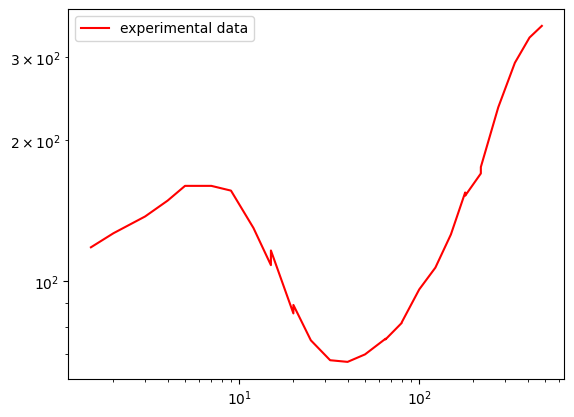

In [3]:
plt.loglog(AB2,experimental_rhoa,c='red', label='experimental data')
plt.legend()

In [4]:
N_layers_list=[5] # список из количества слоёв в моделях
exp_data=np.array([AB2, experimental_rhoa]).T # Данные
method='U'
start=[100, 1,
        150, 4,
        400, 6,
        17.5, 40,
        150, 100, 
        1200]
bound=[(50,150), (0.1,2),
        (100,200), (0.1,8),
        (100,500), (0.1,15),
        (0,100), (0.1,60),
        (100,300), (0.1,150), 
        (200,2000)]

21.062689032393
19.08859811995108 %


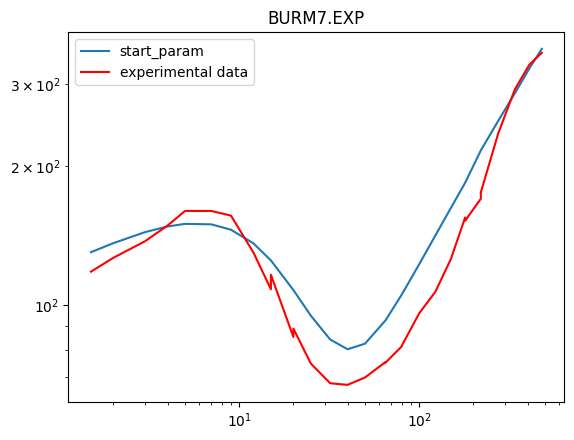

In [5]:
rk_start=[]
for r in AB2:
    rk_start.append(calculate_apparent_resistance(start,method,r,num_of_zeros=10*int(1+r/200)))
rk_start=np.array(rk_start)
plt.loglog(AB2,rk_start, label='start_param')
plt.loglog(AB2,experimental_rhoa,c='red', label='experimental data')
plt.legend()
plt.title(path_to_experimental_data.split('/')[2])
print(RMSE(rk_start,experimental_rhoa))
print(RMSPE(rk_start,experimental_rhoa),'%')

In [6]:
loss='RMSPE'
minim='L-BFGS-B'
results=inverse_problem_solver(method, exp_data, minimization_method=minim, loss_type=loss, start=start, boundaries=bound) 

In [7]:
#Вывод количества слоёв в модели, её параметров и полученной ошибки
t=''
if loss=="RMSPE": t='%'
if loss=="RMSE": t='Ом'
print('\nnumber of layers= ', int((len(results.x)+1)/2), '\nparam =', results.x, f'\nloss {loss} =', results.fun,t)


number of layers=  6 
param = [8.77281690e+01 2.00000000e+00 1.50839246e+02 2.91576335e-01
 4.00167397e+02 6.50040639e+00 1.34944101e+01 4.20397240e+01
 1.50066383e+02 9.90490601e+01 1.20073596e+03] 
loss RMSPE = 6.606891342820444 %


Text(0.5, 1.0, 'BURM7.EXP')

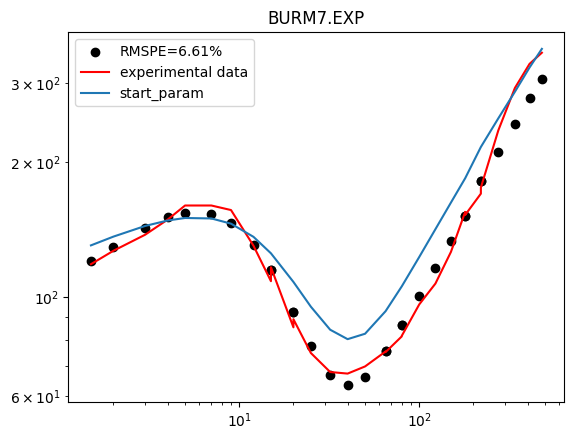

In [8]:
# Визуализация

rk=[]
for r in AB2:
    rk.append(calculate_apparent_resistance(results.x,method,r,num_of_zeros=10*int(1+r/200)))
rk=np.array(rk)
plt.scatter(AB2,rk, c='black',label=f'{loss}={round(results.fun,2)}{t}')
plt.loglog(AB2,experimental_rhoa,c='red', label='experimental data')
plt.loglog(AB2,rk_start, label='start_param')
plt.legend()
plt.title(path_to_experimental_data.split('/')[2])

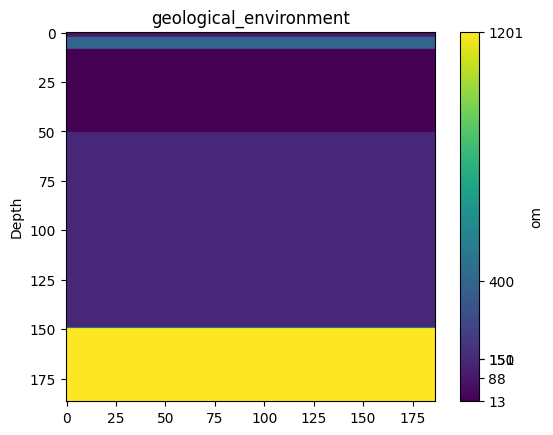

In [9]:
fig=plt.figure()
plt.imshow(geological_environment(results.x))
plt.ylabel('Depth')
plt.title('geological_environment')
plt.colorbar(label='om', ticks=results.x[0::2])

In [10]:
RMSPE(rk,experimental_rhoa)

6.606891342820444

In [11]:
RMSE(rk,experimental_rhoa)

16.638831000762128